# Step 1: Import Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Added cross_val_score here
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Split Data and Setup Model with GridSearchCV

We split the data into training and test sets (80%/20%).
Set up a DecisionTreeRegressor and use GridSearchCV to automatically find the best hyperparameters for the model using 5-fold cross-validation.

We perform this step because, when fitting the model with the default hyperparameters, we observe a significant difference in R² values: 0.83 on the test data and 0.66 on cross-validation. This indicates potential overfitting, and using GridSearchCV helps to tune the hyperparameters to reduce this gap and improve generalization.


In [4]:
df = pd.read_csv('prepared_nofluffjobs_Dec24.csv')
X = df.drop(columns=['Minimum Salary'])  
y = df['Minimum Salary']
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

model = DecisionTreeRegressor(random_state=42)

In [7]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                  
    scoring='r2',           
    n_jobs=-1,              
    verbose=1               
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [8]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best params: {best_params}")

Best params: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


# Step 3: Evaluate Model Performance

- We evaluate the model's performance on the test set using MAE, MSE, and R².
- Perform cross-validation to assess the model's stability and print the R² scores from each fold.


**Model evaluation on test set**

In [19]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

MAE: 2552.06, MSE: 10290111.30, R²: 0.77


**Cross-validation evaluation**

In [20]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² from CV: {cv_scores.mean():.2f}")


Cross-validation R² scores: [0.75063437 0.64622365 0.69097535 0.81647954 0.75948982]
Mean R² from CV: 0.73


# Step 4: Visualize Actual vs Predicted Salaries

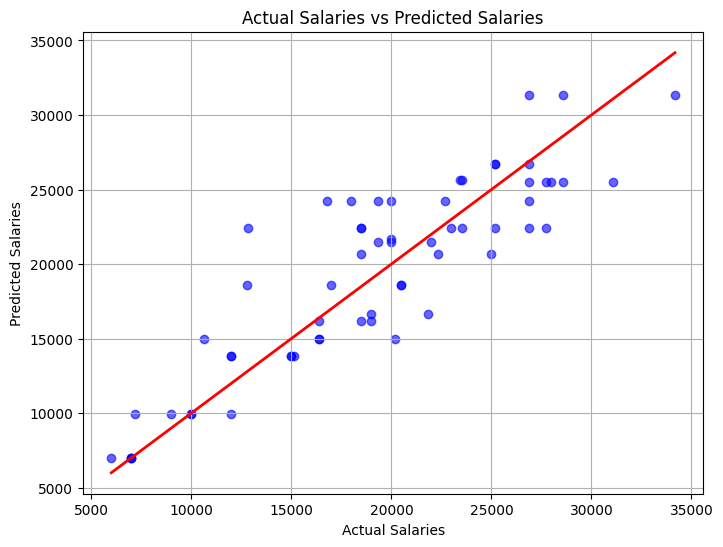

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual Salaries vs Predicted Salaries")
plt.grid(True)
plt.show()

# Conclusion

Test Data: R² = 0.77, MAE = 2552.06, MSE = 10290111.30
    The R² decreased slightly (from 0.83 to 0.77), and the errors (MAE and MSE) increased, indicating a slight drop in performance on the test set.

Cross-validation: Mean R² = 0.73, with scores ranging from 0.65 to 0.82
    The cross-validation performance improved (from 0.67 to 0.73), suggesting better consistency across folds after tuning.

Before GridSearch: The model performed better on the test data but had significant overfitting (high difference between test R² and cross-validation).
After GridSearch: The model's test performance decreased slightly, but cross-validation consistency improved, indicating a better balance between fit and generalization.